# *-| Banana Leaf Disease Detection and Classification |-

# 1:Import necessary libraries

In [1]:
import os
import cv2 
import keras
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.utils import to_categorical 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import load_img
from sklearn.metrics import classification_report
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("Tensorflow version: ",tf.__version__)
print("Keras version: ",keras.__version__)
sklearn.show_versions()

Tensorflow version:  2.3.0
Keras version:  2.4.3

System:
    python: 3.8.6 | packaged by conda-forge | (default, Nov 27 2020, 18:58:29) [MSC v.1916 64 bit (AMD64)]
executable: D:\Anaconda\envs\sib\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 49.6.0.post20201009
      sklearn: 0.23.2
        numpy: 1.19.4
        scipy: 1.5.3
       Cython: None
       pandas: 1.1.3
   matplotlib: 3.3.1
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True


# 2. Data Preprocessing

In [3]:
def Img_preprocessing(n):
    
    #step-1: Convert rgb to grayscale
    gray_scale=cv2.cvtColor(n, cv2.COLOR_BGR2GRAY )
    
    
    #step-2: Resize the image-----------------
    img_size=200
    resized_img=cv2.resize(gray_scale,(img_size,img_size)) #resize your image so your all images will have same size
    
    #step-3:do histogram equalisation to increase contrast of an image-------------
    equ = cv2.equalizeHist(resized_img)
    
    
    #step-4:remove noise :using gaussian blur----------------(for smoothing the image)
    #blur=cv2.GaussianBlur(equ,(5,5),0)
    blur=cv2.medianBlur(equ,5)
    
    #step-5: Image segmentation for edge detection-------------
    #edges = cv2.Canny(equ,100,200) 
    #edges = cv2.Laplacian(equ, cv2.CV_16S, ksize=3)
    grad_x = cv2.Sobel(blur, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(blur, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)   #sobel derivative
    
    clean_data =edges
    return clean_data




dir1="C:\\Users\\sahoo\\Desktop\\Banana_leaf_disease"
catg=['Banana Bacterial Wilt','Black sigatoka disease','Healthy']

img_cube=[]
image_size=800

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        final_data=Img_preprocessing(img_arr)
        img_cube.append([final_data,label])
print("Length of your dataset: ",len(img_cube))
print("Whole image data in array format:\n",img_cube[10])

Length of your dataset:  2355
Whole image data in array format:
 [array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


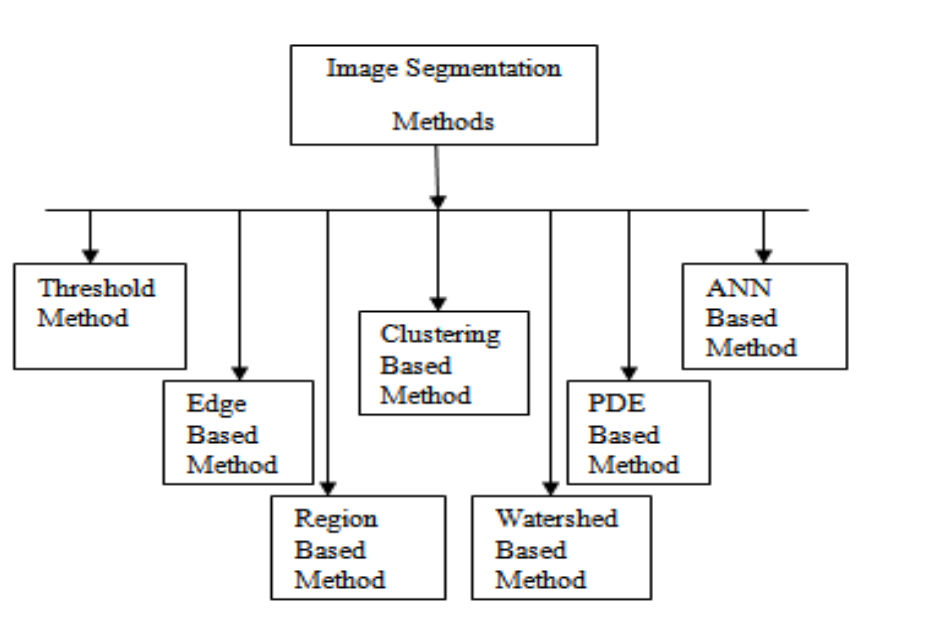

In [4]:
from IPython.display import Image
Image(filename='C:/Users/sahoo/Desktop/Banana_leaf_disease/img_seg.png')

0

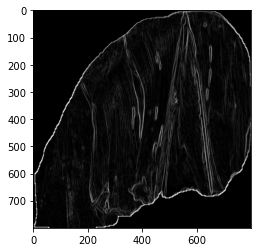

In [4]:
plt.imshow(img_cube[3][0],cmap='gray')
img_cube[3][1]

1

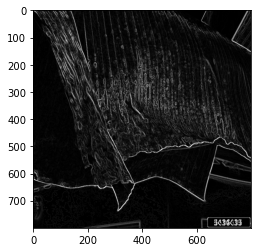

In [5]:
plt.imshow(img_cube[350][0],cmap='gray')
img_cube[350][1]

In [6]:
img_cube[350][0].shape

(800, 800)

2

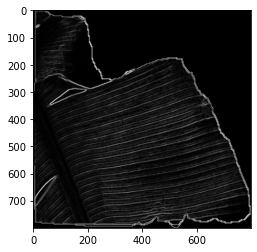

In [7]:
plt.imshow(img_cube[500][0],cmap='gray')
img_cube[500][1]

In [72]:
#now i am trying to shuffle the data 
random.shuffle(img_cube)

for i in img_cube[:10]:
    print(i[1])

#these are the random labels generated 
#as i have 3 types of image folder in the dataset

2
2
1
2
0
0
2
2
2
0


# 3.Classifier implementation

In [4]:
from sklearn.svm import SVC

feature=[]
target=[]
for i in img_cube:
    flat=i[0].flatten()
    feature.append(flat)
for i in img_cube:
    target.append(i[1])
    
len(feature),len(target)

x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.25,random_state=42)

clf1=SVC().fit(x_train,y_train)
y_pred=clf1.predict(x_test)

print("*-*"*100)
print(accuracy_score(y_test,y_pred)*100)
print("*-*"*100)

feature[10]

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
65.53480475382003
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Evaluation matrix

              precision    recall  f1-score   support

         BBW       0.79      0.80      0.80        66
         BSD       1.00      0.53      0.69        32
     Healthy       0.85      0.97      0.91        99

    accuracy                           0.84       197
   macro avg       0.88      0.77      0.80       197
weighted avg       0.85      0.84      0.83       197



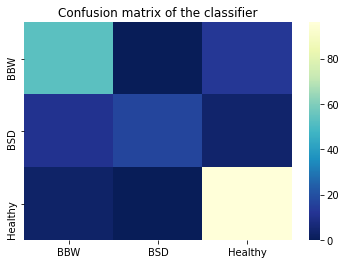

In [59]:
labels={0:'BBW',1:'BSD',2:'Healthy'}
plt.title('Confusion matrix of the classifier')
sns.heatmap(confusion_matrix(y_test,y_pred,),cmap="YlGnBu_r", xticklabels=['BBW', 'BSD','Healthy'],yticklabels=['BBW', 'BSD','Healthy'])

confusion_matrix(y_test,y_pred)
from sklearn.metrics import classification_report
k=classification_report(y_test,y_pred,target_names=['BBW', 'BSD','Healthy'])
print(k)

# Comparing Accuracy without doing preprocessing

In [2]:
from sklearn.svm import SVC

In [10]:
dir2="C:\\Users\\sahoo\\Desktop\\Banana_leaf_disease"
catg=['Banana Bacterial Wilt','Black sigatoka disease','Healthy']

img_cube2=[]
image_size=500

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir2,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j))
        gray_scale=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        resized_img=cv2.resize(gray_scale,(200,200))
        img_cube2.append([resized_img,label])

random.shuffle(img_cube2)

feature2=[]
target2=[]
for i in img_cube2:
    flat=i[0].flatten()
    feature2.append(flat)
for i in img_cube2:
    target2.append(i[1])
    
#len(feature2),len(target2)

x_train2,x_test2,y_train2,y_test2=train_test_split(feature2,target2,test_size=0.25,random_state=42)

clf1=SVC().fit(x_train2,y_train2)
y_pred2=clf1.predict(x_test2)

print("*-*"*100)
print(accuracy_score(y_test2,y_pred2)*100)
print("*-*"*100)

feature[10]

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
35.653650254668925
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Comparing Accuracy with colored image

In [6]:
dir2="C:\\Users\\sahoo\\Desktop\\Banana_leaf_disease"
catg=['Banana Bacterial Wilt','Black sigatoka disease','Healthy']

img_cube2=[]
image_size=500

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir2,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j))
        #gray_scale=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        resized_img=cv2.resize(img_arr,(200,200))
        img_cube2.append([resized_img,label])

random.shuffle(img_cube2)

feature2=[]
target2=[]
for i in img_cube2:
    flat=i[0].flatten()
    feature2.append(flat)
for i in img_cube2:
    target2.append(i[1])
    
#len(feature2),len(target2)
feature2 = np.array(feature2)/ 255.0

x_train2,x_test2,y_train2,y_test2=train_test_split(feature2,target2,test_size=0.25,random_state=42)

clf1=SVC().fit(x_train2,y_train2)
y_pred2=clf1.predict(x_test2)

print("*-*"*100)
print(accuracy_score(y_test2,y_pred2)*100)
print("*-*"*100)


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
74.70288624787777
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [9]:
x_train.shape

(1766, 200, 200, 3)

# Data augmentation

In [7]:
data_aug=ImageDataGenerator(  rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              channel_shift_range=0.2,
                              zoom_range=0.2,
                              fill_mode="nearest",
                              horizontal_flip=True,
                              vertical_flip=True,      
                             )         
s=data_aug.flow(x_train,y_train, batch_size = 32)
s[0][0][0]

array([[[0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        ...,
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972]],

       [[0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        ...,
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972]],

       [[0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        ...,
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972]],

       ...,

       [[0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        [0.8933972, 0.8933972, 0.8933972],
        ...,
        [0.8933972, 0.8933

In [42]:
#for BBW class
i=0
for batch in data_aug.flow_from_directory(directory="C:/Users/sahoo/Desktop/Banana_leaf_disease/",
                                          classes=['Banana Bacterial Wilt'],
                                          batch_size=32,
                                          target_size=(500,500),
                                          color_mode='rgb',
                                          save_to_dir='C:/Users/sahoo/Desktop/Banana_leaf_disease/Banana Bacterial Wilt',
                                          save_prefix='aug',
                                          save_format='png'):
    i += 1
    if i>19: #for a particular class it creates 20 image for image in that class
        break

Found 278 images belonging to 1 classes.


In [46]:
#for BSD class
i=0
for batch in data_aug.flow_from_directory(directory="C:/Users/sahoo/Desktop/Banana_leaf_disease/",
                                          classes=['Black sigatoka disease'],
                                          batch_size=32,
                                          target_size=(500,500),
                                          color_mode='rgb',
                                          save_to_dir='C:/Users/sahoo/Desktop/Banana_leaf_disease/Black sigatoka disease',
                                          save_prefix='aug',
                                          save_format='png'):
    i += 1
    if i>19: #for a particular class it creates 20 image for image in that class
        break

Found 108 images belonging to 1 classes.


In [47]:
#for healthy class
i=0
for batch in data_aug.flow_from_directory(directory="C:/Users/sahoo/Desktop/Banana_leaf_disease/",
                                          classes=['Healthy'],
                                          batch_size=32,
                                          target_size=(500,500),
                                          color_mode='rgb',
                                          save_to_dir='C:/Users/sahoo/Desktop/Banana_leaf_disease/Healthy',
                                          save_prefix='aug',
                                          save_format='png'):
    i += 1
    if i>19: #for a particular class it creates 20 image for image in that class
        break

Found 393 images belonging to 1 classes.


# Extract the Data

In [2]:
dir1="C:\\Users\\sahoo\\Desktop\\Banana_leaf_disease"
catg=['Banana Bacterial Wilt','Black sigatoka disease','Healthy']

img_cube3=[]
#image_size=800

for i in catg: #this will take the folder names as we call it as categoris
    path=os.path.join(dir1,i)
    label=catg.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        #gray_img=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        final_data=cv2.resize(img_arr,(100,100))
        img_cube3.append([final_data,label])
        
img_cube3[10]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

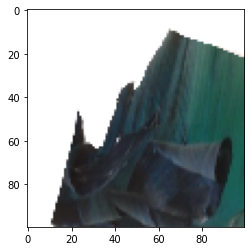

In [3]:
feat3=[]
tar3=[]
for i,j in img_cube3:
    feat3.append(i)
    tar3.append(j)
x=np.array(feat3)
x=x/255.0 #as scaling the values between 0 to 1 becuz lesser the values faster will be the calculation
y=np.array(tar3)
plt.imshow(x[500],cmap='gray')

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.30)
x_train.shape

(1648, 100, 100, 3)

In [5]:
#y_train=to_categorical(y_train, dtype ="float64")
#y_test=to_categorical(y_test,  dtype ="float64")

In [6]:
y_test.shape,y_train.shape

((707,), (1648,))

In [34]:
x_train.dtype,y_train.dtype

(dtype('float64'), dtype('int32'))

In [5]:
#x_train2=x_train2.reshape(len(x_train2),200,200,1) #these two lines are not applicable for colored image we can directly fit those values
#x_test2=x_test2.reshape(len(x_test2),200,200,1)

# Data augmentation for a single image

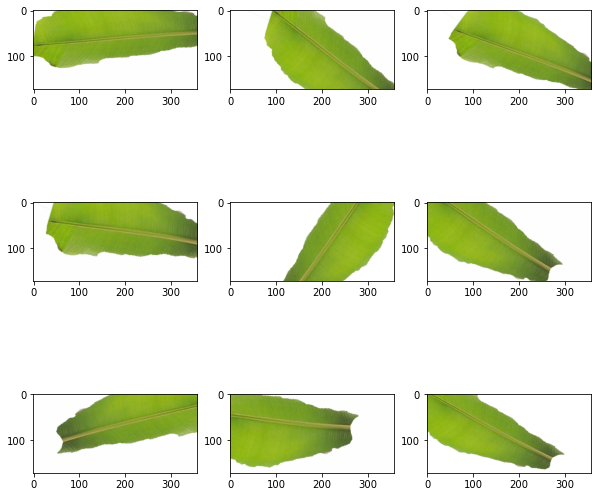

In [41]:
# example of horizontal shift image augmentation
from numpy import expand_dims

# load the image
img = load_img("C:/Users/sahoo/Desktop/Banana_leaf_disease/Healthy/9.png")
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)

# prepare iterator
it = data_aug.flow(samples, batch_size=9)
# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

# Train Neural network model

In [10]:
cnn2=Sequential()

#convolutional layer-1
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-2
cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))

#convolutional layer-3
cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))


#convolutional layer-4
cnn2.add(Conv2D(256, kernel_size=(3, 3), activation='relu',  padding='same'))
cnn2.add(MaxPooling2D(2,2))


#flatten layer
cnn2.add(Flatten(input_shape=x_train.shape[1:] ))


cnn2.add(Dense(256,activation='relu'))

#densly connected layer
cnn2.add(Dense(128,activation='relu'))

#output layer
cnn2.add(Dense(3,activation='softmax'))


cnn2.compile(optimizer='Adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
#logit=true when we not use any normalization for last layer that means if we don't apply any act. fun then keep logit=true0----
#with RMSPROP got 74-72%
#SGD found 57%



history2=cnn2.fit(  x_train,
          y_train,
          verbose=1,
          epochs=200,  #20
          batch_size=32,  #15
          validation_data=(x_test,y_test) )

Epoch 1/200
52/52 [==============================] - 18s 349ms/step - loss: 1.0918 - accuracy: 0.3617 - val_loss: 1.0876 - val_accuracy: 0.3904
Epoch 2/200
52/52 [==============================] - 18s 349ms/step - loss: 1.0796 - accuracy: 0.4308 - val_loss: 1.0798 - val_accuracy: 0.4229
Epoch 3/200
52/52 [==============================] - 19s 367ms/step - loss: 1.0710 - accuracy: 0.4587 - val_loss: 1.0735 - val_accuracy: 0.4724
Epoch 4/200
52/52 [==============================] - 19s 357ms/step - loss: 1.0622 - accuracy: 0.4751 - val_loss: 1.0649 - val_accuracy: 0.5035
Epoch 5/200
52/52 [==============================] - 19s 360ms/step - loss: 1.0517 - accuracy: 0.4678 - val_loss: 1.0540 - val_accuracy: 0.5007
Epoch 6/200
52/52 [==============================] - 19s 372ms/step - loss: 1.0389 - accuracy: 0.4988 - val_loss: 1.0392 - val_accuracy: 0.4767
Epoch 7/200
52/52 [==============================] - 19s 359ms/step - loss: 1.0235 - accuracy: 0.5079 - val_loss: 1.0216 - val_accuracy:

52/52 [==============================] - 19s 370ms/step - loss: 0.3648 - accuracy: 0.8519 - val_loss: 0.4068 - val_accuracy: 0.8274
Epoch 114/200
52/52 [==============================] - 19s 368ms/step - loss: 0.3632 - accuracy: 0.8441 - val_loss: 0.4011 - val_accuracy: 0.8331
Epoch 115/200
52/52 [==============================] - 19s 370ms/step - loss: 0.3627 - accuracy: 0.8574 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 116/200
52/52 [==============================] - 19s 363ms/step - loss: 0.3562 - accuracy: 0.8538 - val_loss: 0.4221 - val_accuracy: 0.8388
Epoch 117/200
52/52 [==============================] - 19s 372ms/step - loss: 0.3582 - accuracy: 0.8519 - val_loss: 0.4652 - val_accuracy: 0.8105
Epoch 118/200
52/52 [==============================] - 22s 432ms/step - loss: 0.3666 - accuracy: 0.8441 - val_loss: 0.4179 - val_accuracy: 0.8303
Epoch 119/200
52/52 [==============================] - 22s 427ms/step - loss: 0.3584 - accuracy: 0.8568 - val_loss: 0.3962 - val_accuracy:

# Observation

>By giving batch size 50 and test size 30% and using optimizer ADAM we found acc 99,86 and loss 0.02,0.60 for training and testing(without using any act. fun in output layer)

>By giving batch size 50 and test size 30% and using SGD as optimizer accuracy found 89,79 and loss found 0.26,0.60(loss for testing flacutating) for training and validation. 

>By using ADAMAX optimizer with 50 epoch accuracy found 100,86 and loss found 0.001 and 0.56(loss of test lies between 0.60 to 0.50) for training and validation.(without using any act. fun in output layer)

>Using Adadelta with 50 epoch accuracy and loss found 55,53(same acc flowing for 20 no of epochs) and 1.02,1.02 (same loss flowing after certain no of epoch)

In [12]:
# Evaluating the Predictions on the Model

score = cnn2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34758931398391724
Test accuracy: 0.8642150163650513


In [13]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(cnn2.predict(x_test[i].reshape(1,100,100,3)))
        
len(y_test),len(y_pred)

(707, 707)

In [14]:
y_pred[:10]  #to get max probability value we use argmax

[array([[2.2913022e-02, 7.0120994e-04, 9.7638583e-01]], dtype=float32),
 array([[0.29155758, 0.6925101 , 0.01593229]], dtype=float32),
 array([[0.58120924, 0.37415347, 0.04463734]], dtype=float32),
 array([[3.0510502e-02, 9.6948773e-01, 1.6926377e-06]], dtype=float32),
 array([[1.0845931e-03, 9.9891543e-01, 1.6304408e-10]], dtype=float32),
 array([[0.09965508, 0.00986208, 0.8904829 ]], dtype=float32),
 array([[0.04808995, 0.02056084, 0.93134916]], dtype=float32),
 array([[0.06812774, 0.00165558, 0.9302167 ]], dtype=float32),
 array([[2.2174212e-01, 7.7825749e-01, 3.5484081e-07]], dtype=float32),
 array([[0.77413714, 0.09619875, 0.12966414]], dtype=float32)]

In [15]:
result=[]
for i in range(len(x_test)):
    result.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
result[:10]

[array([2], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 256)      

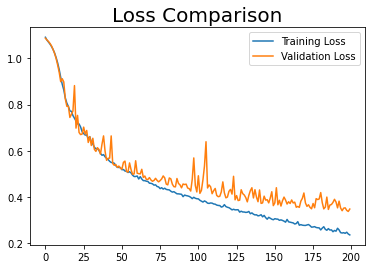

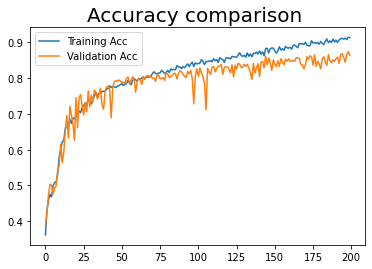

In [35]:
cnn2.summary()


y_pred2=result

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,np.array(y_pred2)))
#using adam accuracy was 83%
#using adadelta accuracy was 89%
print("*-*"*40)
print("Confusion Matrix:\n",confusion_matrix(y_test,np.array(y_pred2))) 
print("*-*"*40)
print("Classification Report:\n",classification_report(y_test,np.array(y_pred2)))
print("*-*"*40)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history2.history['accuracy'],)
plt.plot(history2.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [21]:
#pickle and joblib
from keras.models import save_model
#model.save("Banana_leaf_classification.h5") 


# Save the model
#filepath = 'C:/Users/sahoo/Desktop/Banana_leaf_disease'
#save_model(cnn2, filepath)


cnn2.save("BananaLeaf_classifier.h5")

In [28]:
#path=r'C:\Users\sahoo\Desktop\Banana_leaf_disease\Deploy'
cnn2.save("C:/Users/sahoo/Desktop/Banana_leaf_disease/Deploy/BananaLeaf_classifier.h5")

# Model Testing

In [22]:
# Load the model
from keras.models import load_model

#filepath = 'C:/Users/sahoo/Desktop/Banana_leaf_disease'
mymodel = load_model("BananaLeaf_classifier.h5")

In [23]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 256)      

In [32]:
def prediction(result,model): #type of result should be an array
    arr=cv2.resize(result,(100,100))
    y_prediction= mymodel.predict(arr.reshape(1,100,100,3))
    result=np.argmax(y_prediction,axis=1) #take the index value of that array which value is maximum
    if result==0:
        print('It has a disease called Black Bacterial Wilt')
    elif result==1:
        print('It has a disease called Black Sigatoka Disease')
    elif result==2:
        print('Wohh!!! It is a healthy Leaf')
        
prediction(x_test[309],mymodel)

It has a disease called Black Bacterial Wilt


In [33]:
y_test[309]

0

# Model Deployment

In [ ]:
#In the next folder you can see the deployment for this model

In [ ]:
#deployment is done on myapp.py file 